In [11]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']

# ARIMA模型

## 一、就业人员预测

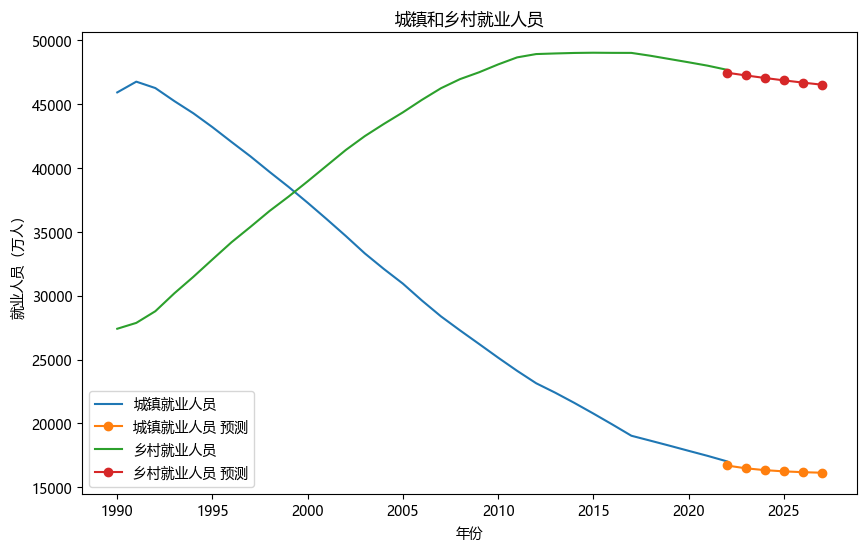

In [18]:
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/城乡就业人员数据.csv"
data = pd.read_csv(file_path)

# 提取城镇就业人员和乡村就业人员数据
urban_employment = data[data['指标'] == '城镇就业人员(万人)'].iloc[:, 1:].squeeze()
rural_employment = data[data['指标'] == '乡村就业人员(万人)'].iloc[:, 1:].squeeze()

# 合并为一个DataFrame
employment_data = pd.concat([urban_employment, rural_employment], axis=1)
employment_data.columns = ['城镇就业人员', '乡村就业人员']

# 使用ARIMA模型预测未来5年的数据
plt.figure(figsize=(10, 6))

for col in employment_data.columns:
    model = ARIMA(employment_data[col], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=6)  # 预测未来6年，包括2023到2028年
    plt.plot(range(1990, 2023), employment_data[col], label=col)
    plt.plot(range(2022, 2028), forecast, marker='o', label=f'{col} 预测')

plt.title('城镇和乡村就业人员')
plt.xlabel('年份')
plt.ylabel('就业人员（万人）')
plt.legend()
plt.show()


# 调参

In [21]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error


# 设置参数范围
p_range = [0, 1, 2]  # AR阶数
d_range = [0, 1]      # 差分阶数
q_range = [0, 1, 2]  # MA阶数

best_aic = np.inf
best_order = None

# 遍历参数组合
for p, d, q in itertools.product(p_range, d_range, q_range):
    order = (p, d, q)
    try:
        model = ARIMA(employment_data['城镇就业人员'], order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print("Best ARIMA order:", best_order)


Best ARIMA order: (2, 0, 1)


要改的就是这个参数，model = ARIMA(employment_data[col], order=(2, 1, 3))


在ARIMA模型中，参数包括三个部分：AR（AutoRegressive）、I（Integrated）和MA（Moving Average）。

1. AR（自回归）阶数（p）：表示模型中考虑的过去观测值的数量，即模型中的自回归项数。AR阶数决定了当前观测值与过去多少个观测值相关联。较高的AR阶数意味着模型会考虑更多过去的数据，因此在模型中引入更多的自回归项。

2. I（积分）阶数（d）：表示模型中使用的差分阶数，即对时间序列进行平稳化所需的差分次数。积分阶数通常用于使时间序列平稳化，即消除趋势和季节性。如果时间序列是平稳的，积分阶数通常为0；如果序列具有趋势，则需要进行一阶差分（d=1）或更高阶的差分。

3. MA（移动平均）阶数（q）：表示模型中使用的移动平均项的数量，即模型中的滞后误差项数。MA阶数决定了模型中的滞后误差项数量，它反映了模型对观测误差的修正程度。较高的MA阶数意味着模型会考虑更多滞后误差项，从而更好地捕捉序列中的噪声或随机性。

综合来说，ARIMA模型的参数代表了模型的自回归、差分和移动平均的程度，通过调整这些参数，可以更好地拟合和预测时间序列数据。

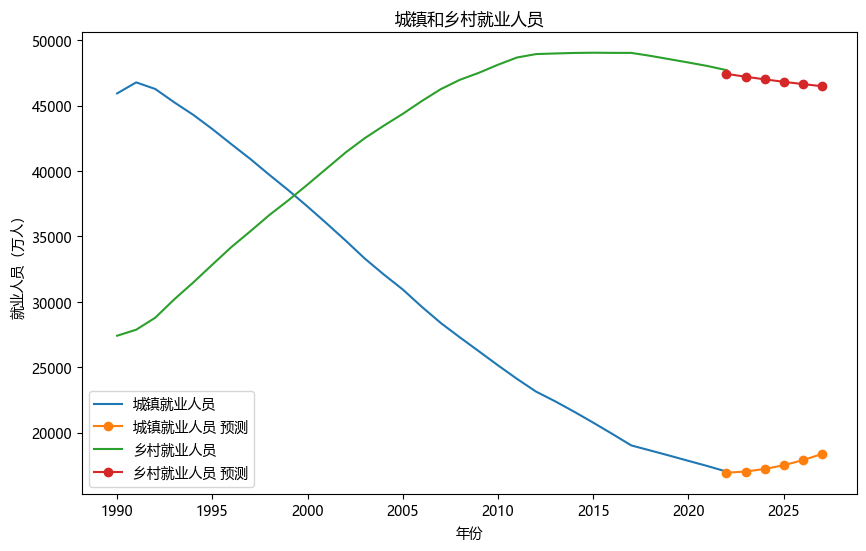

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/城乡就业人员数据.csv"
data = pd.read_csv(file_path)

# 提取城镇就业人员和乡村就业人员数据
urban_employment = data[data['指标'] == '城镇就业人员(万人)'].iloc[:, 1:].squeeze()
rural_employment = data[data['指标'] == '乡村就业人员(万人)'].iloc[:, 1:].squeeze()

# 合并为一个DataFrame
employment_data = pd.concat([urban_employment, rural_employment], axis=1)
employment_data.columns = ['城镇就业人员', '乡村就业人员']

# 使用ARIMA模型预测未来5年的数据
plt.figure(figsize=(10, 6))

for col in employment_data.columns:
    model = ARIMA(employment_data[col], order=(2, 1, 3))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=6)  # 预测未来6年，包括2023到2028年
    plt.plot(range(1990, 2023), employment_data[col], label=col)
    plt.plot(range(2022, 2028), forecast, marker='o', label=f'{col} 预测')

plt.title('城镇和乡村就业人员')
plt.xlabel('年份')
plt.ylabel('就业人员（万人）')
plt.legend()
plt.show()


# ARIMA模型 和 指数平滑模型 对比

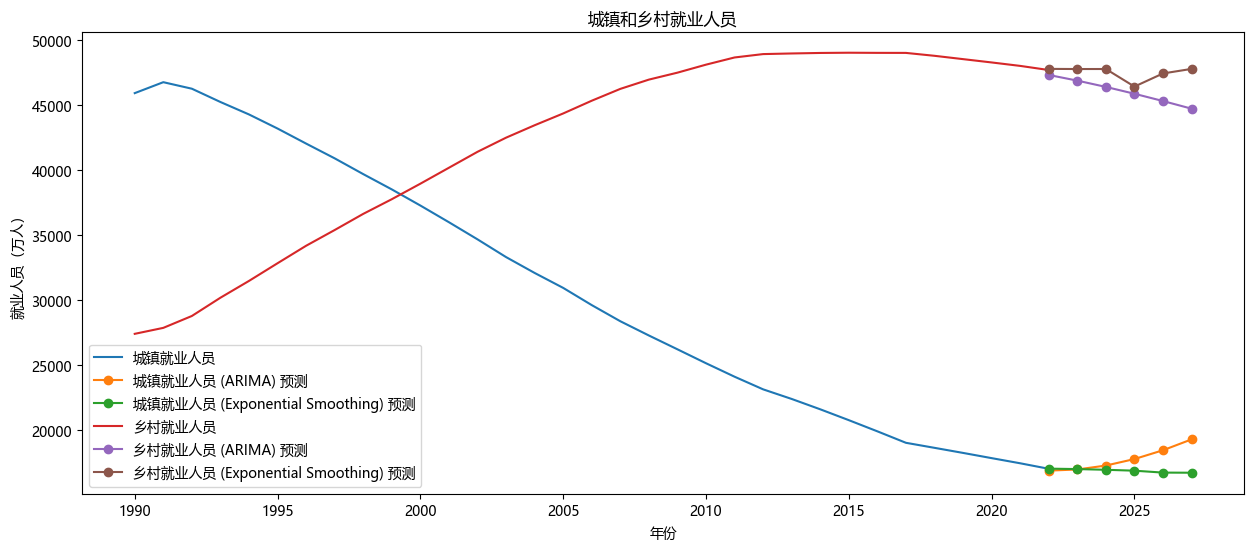

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


# 读取CSV文件
file_path = "./data/城乡就业人员数据.csv"
data = pd.read_csv(file_path)

# 提取城镇就业人员和乡村就业人员数据
urban_employment = data[data['指标'] == '城镇就业人员(万人)'].iloc[:, 1:].squeeze()
rural_employment = data[data['指标'] == '乡村就业人员(万人)'].iloc[:, 1:].squeeze()

# 合并为一个DataFrame
employment_data = pd.concat([urban_employment, rural_employment], axis=1)
employment_data.columns = ['城镇就业人员', '乡村就业人员']

# 使用ARIMA模型预测未来5年的数据
plt.figure(figsize=(15, 6))

for col in employment_data.columns:
    # ARIMA模型
    model = ARIMA(employment_data[col], order=(2, 0, 1))
    model_fit = model.fit()
    forecast_arima = model_fit.forecast(steps=6)
    plt.plot(range(1990, 2023), employment_data[col], label=col)
    plt.plot(range(2022, 2028), forecast_arima, marker='o', label=f'{col} (ARIMA) 预测')

    # 指数平滑模型
    model_es = ExponentialSmoothing(employment_data[col], seasonal='add', seasonal_periods=12)
    model_fit_es = model_es.fit()
    forecast_es = model_fit_es.forecast(steps=6)

    plt.plot(range(2022, 2028), forecast_es, marker='o', label=f'{col} (Exponential Smoothing) 预测')

   
plt.title('城镇和乡村就业人员')
plt.xlabel('年份')
plt.ylabel('就业人员（万人）')
plt.legend()
plt.show()


# 以上的过程可以写word里，但答辩只用，找参数，和调好的模型

以下的结论不变，就加个前提，模型对比的情况下

## 结合近几年的环境、政策，开始发展乡村，城市发展出现了边际效应

# 第二个预测——世界各国乡村人口占总人口百分比

In [8]:
import pandas as pd

# 读取CSV文件
file_path = "./data/世界各国乡村人口占总人口百分比.csv"
data = pd.read_csv(file_path)

# 选取中国、美国、俄罗斯、英国、法国五个国家的数据
countries = ['China', 'United States of America', 'Russia', 'United Kingdom', 'France']
selected_data = data[data['Country'].isin(countries)]

# 转换为时间序列格式
selected_data.set_index('Country', inplace=True)
selected_data = selected_data.transpose()
selected_data.index = pd.to_datetime(selected_data.index)

# 显示处理后的数据
print(selected_data.head())



Country    China France Russia United Kingdom United States of America
1990-01-01  73.6   25.9   26.6           21.9                     24.7
1991-01-01  72.7   25.8   26.6           21.9                     24.3
1992-01-01  71.8   25.6   26.6           21.8                     23.9
1993-01-01  70.9   25.4   26.6           21.8                     23.5
1994-01-01    70   25.3   26.6           21.7                     23.1


In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 选取中国、法国、俄罗斯、英国和美国五个国家的数据
countries_data = selected_data[['China', 'France', 'Russia', 'United Kingdom', 'United States of America']]

# 将数据转换为数值型
countries_data = countries_data.apply(pd.to_numeric, errors='coerce')

# 预测未来的时间范围
future_dates = pd.date_range(start='2023-01-01', end='2030-01-01', freq='AS')

# 训练并预测每个国家的乡村人口占总人口百分比
predictions = pd.DataFrame(index=future_dates)

for country in countries_data.columns:
    model = ARIMA(countries_data[country], order=(1, 1, 1))  # 选择ARIMA模型并设置参数
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=8)  # 预测未来8年
    predictions[country] = forecast

# 显示预测结果
print(predictions)


                China     France     Russia  United Kingdom  \
2023-01-01  35.302589  18.238805  24.750539       15.373208   
2024-01-01  34.207394  17.978047  24.603756       15.150310   
2025-01-01  33.114412  17.717726  24.459602       14.931238   
2026-01-01  32.023636  17.457842  24.318029       14.715928   
2027-01-01  30.935064  17.198393  24.178993       14.504313   
2028-01-01  29.848690  16.939379  24.042447       14.296332   
2029-01-01  28.764510  16.680799  23.908347       14.091922   
2030-01-01  27.682520  16.422653  23.776649       13.891021   

            United States of America  
2023-01-01                 16.702230  
2024-01-01                 16.505454  
2025-01-01                 16.309669  
2026-01-01                 16.114870  
2027-01-01                 15.921050  
2028-01-01                 15.728206  
2029-01-01                 15.536332  
2030-01-01                 15.345424  


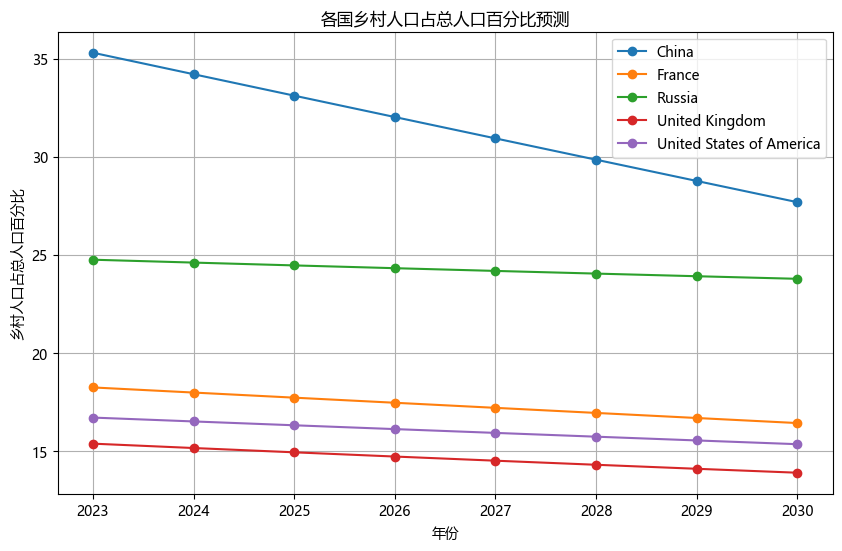

In [17]:
# 去除预测结果中的日期，只保留年份
predictions.index = predictions.index.year

# 绘制预测结果图表
plt.figure(figsize=(10, 6))
for country in predictions.columns:
    plt.plot(predictions.index, predictions[country], marker='o', label=country)

plt.title('各国乡村人口占总人口百分比预测')
plt.xlabel('年份')
plt.ylabel('乡村人口占总人口百分比')
plt.legend()
plt.grid(True)
plt.show()


## 可以看出，虽然我们近10年发展迅速，我们相比其他的五常国家还有不小的差距，还要继续发展